# Analysis the measures of the clusterings

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis
import util
from sklearn.decomposition import PCA
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na option is deprecated.*")

## Loading data

In [45]:
df_base = pd.read_csv('data/output/df_base_without_missing_points.csv', index_col=0)

## Util

In [46]:
k_minimum = 2
k_maximum = 7

In [47]:
def delta(metrica):
    delta_k = {}
    for i in range(1, len(df_metrics) - 1):
        k = df_metrics.k.values[i]
        ch_k = metrica.values[i]
        ch_posterior =  metrica.values[i+1]
        ch_anterior =  metrica.values[i-1]
        delta_k[k] = (ch_posterior - ch_k) - (ch_k - ch_anterior)

    return delta_k

def plot_measure(metrica):
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(6,4))
    sns.lineplot(x=df_metrics.k, y=metrica)
    plt.xticks(df_metrics.k)
    plt.show()
    
def plot_measures(metrics, labels, metrics_comparsion=None, labels_lines=None):
    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    sns.set_palette("gray")
    fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(34.8), util.centimeter_to_inch(7.5)), nrows=1, ncols=3)
    for i in range(len(metrics)):
        metric = metrics[i]
        label = labels[i]
        if labels_lines is not None:
            label_line = labels_lines[0]
        else:
            label_line = None
        sns.lineplot(x=df_metrics.k, y=metric, ax=ax[i], label=label_line)
        if metrics_comparsion is not None:
            sns.lineplot(x=df_metrics.k, y=metrics_comparsion[i], ax=ax[i], color='gray', linestyle='dashed', label=labels_lines[1])
        ax[i].set_title(label)
        ax[i].set_ylabel(None)
        ax[i].set_xticks(df_metrics.k)
        plt.setp(ax[i].artists, edgecolor = 'black')
    fig.tight_layout()    
    if metrics_comparsion is None:
        plt.savefig('images/clustering_measures.pdf', bbox_inches="tight")
    else:
        plt.savefig('images/clustering_measures_comparsion.pdf', bbox_inches="tight")
    plt.show()    

def plot_delta(metrica):
    d = delta(metrica)
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(6,4))
    sns.lineplot(x=d.keys(), y=d.values())
    plt.xticks(df_metrics.k)
    plt.xlabel('k')
    plt.ylabel('Delta')
    plt.show()

def plot_clusters(df_X, Y):
    sns.set(font_scale=1)
    palette = 'Paired'
    fig = plt.figure(figsize=(10,7))
    labels, index = np.unique(Y, return_inverse=True)
    grafico = plt.scatter(x=df_X.principal_component_1, y=df_X.principal_component_2, cmap=palette, c=index)
    plt.legend(grafico.legend_elements()[0], labels, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
    plt.show()

def plot_clusters_original_attributes(axi_x, axi_y, Y):
    sns.set(font_scale=1)
    palette = 'Paired'
    fig = plt.figure(figsize=(10,7))
    labels, index = np.unique(Y, return_inverse=True)
    grafico = plt.scatter(x=axi_x, y=axi_y, cmap=palette, c=index)
    plt.legend(grafico.legend_elements()[0], labels, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel(axi_x.name)
    plt.ylabel(axi_y.name)
    plt.show()

## Analysis

Component:  2


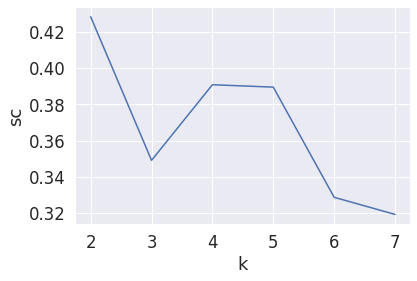

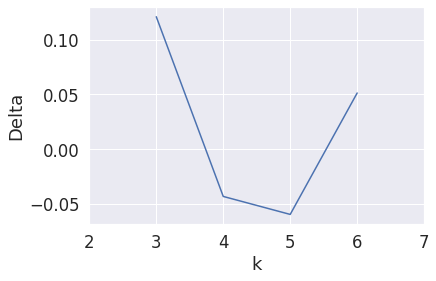

Component:  6


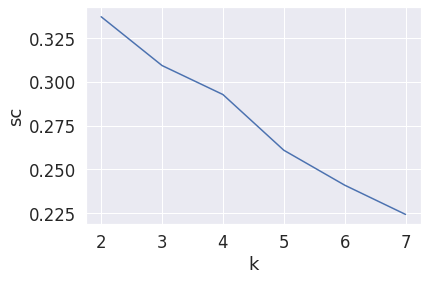

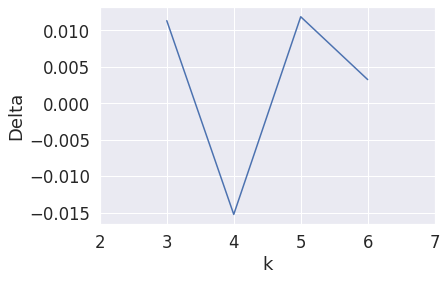

Component:  2


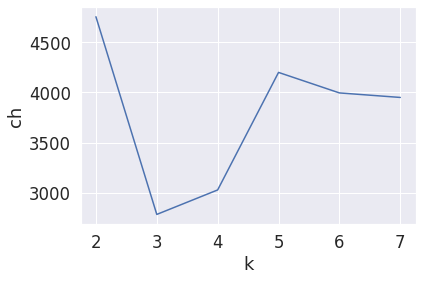

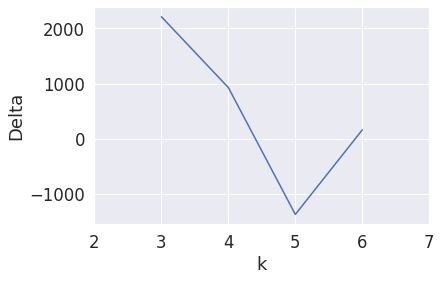

Component:  6


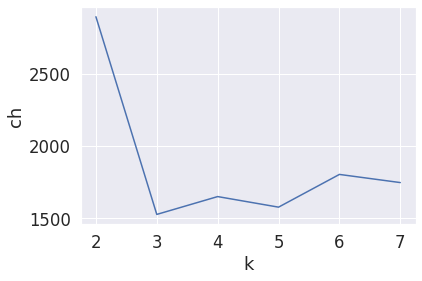

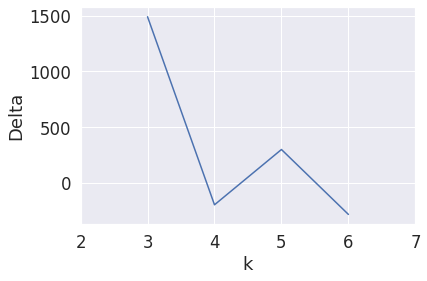

Component:  2


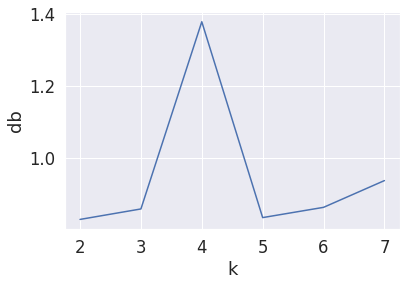

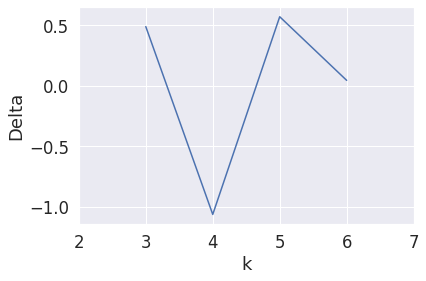

Component:  6


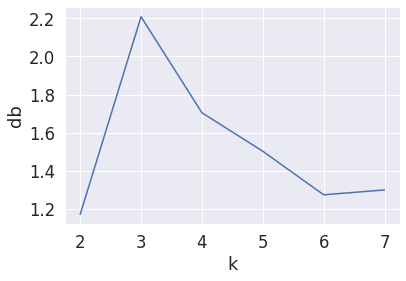

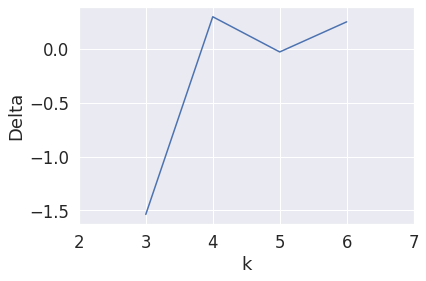

In [48]:
dataset_name = 'df_standardized'
# list_covariance_types = ['full', 'tied', 'diag', 'spherical']
list_covariance_types = ['spherical']
components = [2, 6]

for covariance_type in list_covariance_types:
    for metric in ['sc','ch','db']:
        for component in components:
            print('Component: ', component)
            df = pd.read_csv('data/'+dataset_name+'_pca_'+str(component)+'.csv', index_col=0)

            df_y = pd.read_csv('data/'+dataset_name+'_pca_'+str(component)+covariance_type+'_clustering.csv', index_col=0)
            df_metrics = pd.read_csv('data/'+dataset_name+'_pca_'+str(component)+covariance_type+'_measures.csv', index_col=0)

            plot_measure(df_metrics[metric])
            plot_delta(df_metrics[metric])


## Sociodemographic analysis for the selected model

3    0.389497
Name: sc, dtype: float64


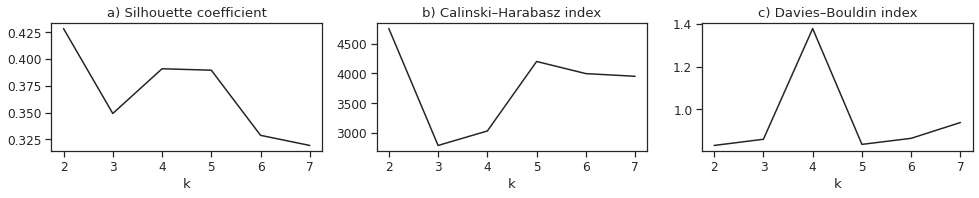

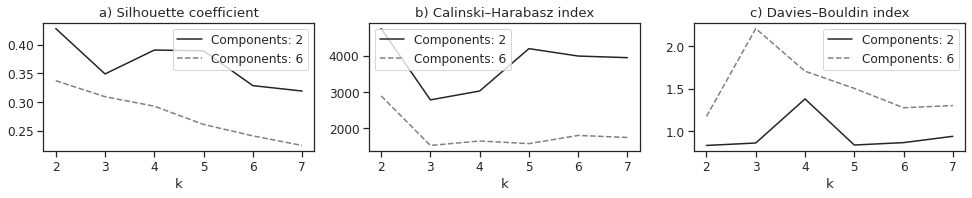

In [49]:
selected_k = 5
selected_dataset = 'df_standardized'
selected_dataset_type = 'pca'
component = 2
selected_set_features = 'all'
selected_covariance_type = 'spherical'


df = pd.read_csv('data/'+selected_dataset+'_pca_'+str(component)+'.csv', index_col=0)

df_metrics = pd.read_csv('data/'+dataset_name+'_pca_'+str(component)+covariance_type+'_measures.csv', index_col=0)
df_y = pd.read_csv('data/'+dataset_name+'_pca_'+str(component)+covariance_type+'_clustering.csv', index_col=0)[[str(selected_k)]]
df_y.columns = ['cluster']
df_base_clusters = df_y.merge(df_base, left_index=True, right_index=True)

print(df_metrics[df_metrics['k']==selected_k]['sc'])                

plot_measures([df_metrics.sc, df_metrics.ch, df_metrics.db], ['a) Silhouette coefficient', 'b) Calinski–Harabasz index', 'c) Davies–Bouldin index'])

df_metrics_comparsion = pd.read_csv('data/'+dataset_name+'_pca_'+str(6)+covariance_type+'_measures.csv', index_col=0)
plot_measures([df_metrics.sc, df_metrics.ch, df_metrics.db], ['a) Silhouette coefficient', 'b) Calinski–Harabasz index', 'c) Davies–Bouldin index'], [df_metrics_comparsion.sc, df_metrics_comparsion.ch, df_metrics_comparsion.db], ['Components: 2','Components: 6'])


In [50]:
df_base_clusters.drop(columns=['code_municipality_7']).groupby('cluster').count()['municipality']

cluster
0    2139
1    1950
2     857
3     307
4     307
Name: municipality, dtype: int64

In [51]:
df_base_clusters.drop(columns=['code_municipality_7','municipality','region']).groupby('cluster').mean().round(2)

,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,average_residents_per_households,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
cluster,,,,,,,,,,,,,,,,,,,,,
0,15973.76,-10.11,-42.11,266602.68,29.77,29.31,25.14,15.79,54.00,2.94,...,23.50,8.16,71.47,1.91,43.58,9.65,30.68,5.00,18.50,8.93
1,29771.22,-21.79,-48.73,380055.63,25.20,28.78,27.55,18.48,81.05,2.70,...,20.71,6.12,39.38,0.66,21.77,12.56,36.41,15.77,6.20,9.97
2,5565.87,-24.76,-50.43,400895.90,23.02,25.53,28.50,22.97,46.22,2.63,...,36.66,2.86,55.63,0.50,51.01,7.18,24.86,8.28,6.96,10.16
3,322515.26,-15.39,-43.78,309330.96,28.25,31.86,26.25,13.68,91.89,2.86,...,20.21,10.54,39.11,2.02,6.81,16.79,46.39,12.28,6.73,9.50
4,22007.97,-4.44,-49.64,190536.80,38.97,30.79,19.92,10.39,43.76,3.72,...,29.21,7.91,80.89,4.26,53.07,7.66,26.98,3.54,19.46,8.00


In [52]:
df_base_clusters.drop(columns=['code_municipality_7','municipality','region']).groupby('cluster').median().round(2)

,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,average_residents_per_households,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
cluster,,,,,,,,,,,,,,,,,,,,,
0,10933.0,-8.89,-40.85,260150.0,29.60,29.29,25.16,15.74,54.48,2.92,...,22.67,7.52,73.62,1.61,43.94,9.20,30.38,3.63,18.82,8.94
1,13821.5,-21.84,-49.27,354165.0,25.06,28.63,27.57,18.56,82.69,2.69,...,20.10,5.91,38.51,0.43,21.33,12.34,36.00,13.86,5.78,9.99
2,4146.0,-26.76,-51.68,421270.0,23.05,25.59,28.38,22.53,47.36,2.62,...,35.04,2.48,56.71,0.27,50.44,6.96,24.51,6.48,6.72,10.21
3,144849.0,-15.80,-43.65,312125.0,27.79,31.59,26.81,13.59,95.17,2.83,...,19.66,10.07,37.83,1.33,3.85,16.45,46.71,10.09,4.94,9.49
4,17107.0,-3.63,-45.96,210200.0,38.21,30.77,20.12,10.26,43.27,3.55,...,28.04,6.88,82.08,3.78,54.11,7.37,25.85,2.70,20.14,8.11


In [53]:
df_base_clusters[df_base_clusters['cluster']==0].drop(columns=['code_municipality_7','municipality','region']).describe().round(2)

,cluster,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
count,2139.0,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,...,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00
mean,0.0,15973.76,-10.11,-42.11,266602.68,29.77,29.31,25.14,15.79,54.00,...,23.50,8.16,71.47,1.91,43.58,9.65,30.68,5.00,18.50,8.93
std,0.0,16005.45,5.16,5.95,76702.10,3.10,2.25,1.85,3.02,17.27,...,8.03,3.80,11.09,1.38,12.49,3.88,6.84,4.65,5.72,0.82
min,0.0,1164.00,-27.79,-68.75,110001.00,14.00,22.45,19.05,5.08,8.32,...,1.36,0.00,27.66,0.00,8.36,1.42,10.95,0.00,4.03,5.71
25%,0.0,5779.50,-13.30,-44.36,221165.00,27.60,27.94,23.92,13.77,41.14,...,18.12,5.52,65.32,0.94,34.84,6.84,25.92,2.21,14.28,8.41
50%,0.0,10933.00,-8.89,-40.85,260150.00,29.60,29.29,25.16,15.74,54.48,...,22.67,7.52,73.62,1.61,43.94,9.20,30.38,3.63,18.82,8.94
75%,0.0,19893.50,-6.46,-37.92,292345.00,31.81,30.68,26.39,17.88,65.88,...,27.84,10.08,79.66,2.52,52.24,11.76,35.08,5.96,22.60,9.48
max,0.0,158188.00,2.61,-34.81,522230.00,41.93,54.73,30.80,26.89,98.90,...,63.81,29.16,94.81,10.16,80.15,36.57,57.12,44.20,34.68,11.82


In [54]:
df_base_clusters[df_base_clusters['cluster']==1].drop(columns=['code_municipality_7','municipality','region']).describe().round(2)

,cluster,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
count,1950.0,1950.00,1950.00,1950.00,1950.00,1950.00,1950.00,1950.00,1950.00,1950.00,...,1950.00,1950.00,1950.00,1950.00,1950.00,1950.00,1950.00,1950.00,1950.00,1950.00
mean,1.0,29771.22,-21.79,-48.73,380055.63,25.20,28.78,27.55,18.48,81.05,...,20.71,6.12,39.38,0.66,21.77,12.56,36.41,15.77,6.20,9.97
std,0.0,53126.58,4.32,3.98,73537.22,2.54,2.84,1.41,3.48,12.58,...,5.58,2.54,11.35,0.69,11.76,3.80,7.53,10.06,2.80,0.91
min,1.0,907.00,-33.69,-63.03,110002.00,8.57,20.53,21.23,6.14,29.32,...,3.19,0.47,12.01,0.00,0.49,2.32,13.71,0.78,1.24,6.95
25%,1.0,6461.75,-23.59,-51.38,320182.50,23.44,27.03,26.69,16.24,74.07,...,16.99,4.35,30.19,0.19,12.65,9.77,31.28,7.72,4.18,9.37
50%,1.0,13821.50,-21.84,-49.27,354165.00,25.06,28.63,27.57,18.56,82.69,...,20.10,5.91,38.51,0.43,21.33,12.34,36.00,13.86,5.78,9.99
75%,1.0,30990.50,-20.03,-46.18,421208.75,26.83,30.30,28.48,20.80,90.72,...,24.03,7.51,47.72,0.90,30.17,14.97,41.36,21.34,7.78,10.60
max,1.0,897938.00,-3.85,-32.44,522205.00,33.70,54.18,32.85,33.96,100.00,...,40.72,22.11,74.79,6.62,57.77,29.34,78.23,65.11,18.33,12.80


In [55]:
df_base_clusters[df_base_clusters['municipality']=='Juvenília (MG)']

,cluster,code_municipality_7,municipality,region,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
2666,0,3136959,Juvenília (MG),Sudeste,5789,-14.263595,-44.15959,313695,30.972534,29.141475,...,19.76,9.68,68.4,2.93,37.32,7.85,40.43,1.96,15.42,7.4


In [56]:
df_base_clusters[df_base_clusters['municipality']=='Brasília (DF)']

,cluster,code_municipality_7,municipality,region,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
5569,3,5300108,Brasília (DF),Centro-Oeste,2817068,-15.794087,-47.887905,530010,26.367095,32.46677,...,16.2,8.58,28.38,1.4,1.84,14.55,62.48,4.25,2.77,9.87


In [57]:
df_base_clusters[df_base_clusters['cluster']==0].drop(columns=['code_municipality_7']).describe().round(2)

,cluster,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
count,2139.0,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,...,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00
mean,0.0,15973.76,-10.11,-42.11,266602.68,29.77,29.31,25.14,15.79,54.00,...,23.50,8.16,71.47,1.91,43.58,9.65,30.68,5.00,18.50,8.93
std,0.0,16005.45,5.16,5.95,76702.10,3.10,2.25,1.85,3.02,17.27,...,8.03,3.80,11.09,1.38,12.49,3.88,6.84,4.65,5.72,0.82
min,0.0,1164.00,-27.79,-68.75,110001.00,14.00,22.45,19.05,5.08,8.32,...,1.36,0.00,27.66,0.00,8.36,1.42,10.95,0.00,4.03,5.71
25%,0.0,5779.50,-13.30,-44.36,221165.00,27.60,27.94,23.92,13.77,41.14,...,18.12,5.52,65.32,0.94,34.84,6.84,25.92,2.21,14.28,8.41
50%,0.0,10933.00,-8.89,-40.85,260150.00,29.60,29.29,25.16,15.74,54.48,...,22.67,7.52,73.62,1.61,43.94,9.20,30.38,3.63,18.82,8.94
75%,0.0,19893.50,-6.46,-37.92,292345.00,31.81,30.68,26.39,17.88,65.88,...,27.84,10.08,79.66,2.52,52.24,11.76,35.08,5.96,22.60,9.48
max,0.0,158188.00,2.61,-34.81,522230.00,41.93,54.73,30.80,26.89,98.90,...,63.81,29.16,94.81,10.16,80.15,36.57,57.12,44.20,34.68,11.82


In [58]:
df_base_clusters.drop(columns=['code_municipality_7','municipality','region']).groupby('cluster').mean().round(2).to_csv('data/summary_clusters_mean.csv')

In [59]:
df_base_clusters.drop(columns=['code_municipality_7','municipality','region']).groupby('cluster').min().round(2).to_csv('data/summary_clusters_min.csv')

In [60]:
df_base_clusters.drop(columns=['code_municipality_7','municipality','region']).groupby('cluster').quantile(0.25).round(2).to_csv('data/summary_clusters_quantile_0_25.csv')

In [61]:
df_base_clusters.drop(columns=['code_municipality_7','municipality','region']).groupby('cluster').median().round(2).to_csv('data/summary_clusters_median.csv')

In [62]:
df_base_clusters.drop(columns=['code_municipality_7','municipality','region']).groupby('cluster').quantile(0.75).round(2).to_csv('data/summary_clusters_quantile_0_75.csv')

In [63]:
df_base_clusters.drop(columns=['code_municipality_7','municipality','region']).groupby('cluster').max().round(2).to_csv('data/summary_clusters_max.csv')

In [64]:
df_base_clusters.loc[df_base_clusters['cluster']==0, 'cluster_label'] = 'Semi-urbanized'
df_base_clusters.loc[df_base_clusters['cluster']==1, 'cluster_label'] = 'Urbanized'
df_base_clusters.loc[df_base_clusters['cluster']==2, 'cluster_label'] = 'Rural with high human development'
df_base_clusters.loc[df_base_clusters['cluster']==3, 'cluster_label'] = 'Urbanized with informal settlements'
df_base_clusters.loc[df_base_clusters['cluster']==4, 'cluster_label'] = 'Rural with low human development'

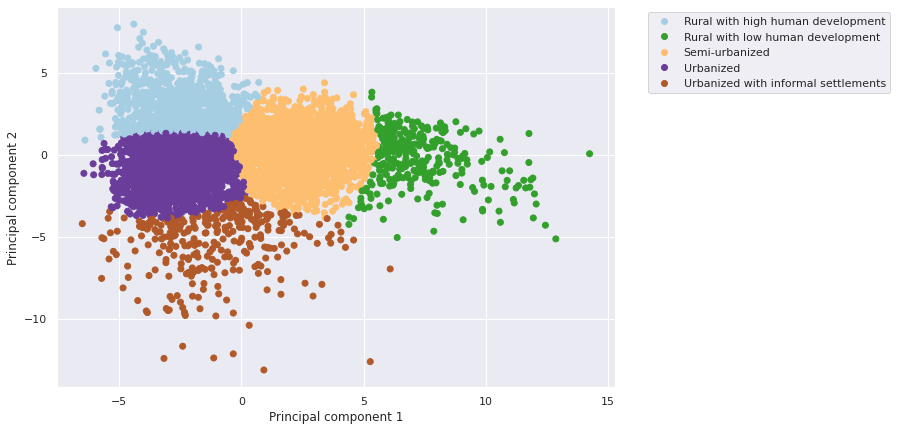

In [65]:
plot_clusters(df, df_base_clusters['cluster_label'])

### Cluster 0: Semi-urbanized
- **Population**: Ranges from around 5,790 to 20,080, with a median population of approximately 11,000.
- **Age Distribution**: Generally balanced across different age ranges.
- **Urbanization**: Moderately urbanized with around 41% to 66% urban population.
- **Income**: Moderate per capita income, ranging from approximately 238 to 334 monetary units, with some variation.
- **Employment**: Significant proportion of self-employed workers and workers in commerce and services sectors.
- **Living Conditions**: Moderate percentage of households in informal settlements, some households without bathrooms, and a notable illiteracy rate.

### Cluster 1: Urbanized
- **Population**: Ranges from around 6,570 to 31,903, with a median population of approximately 13,976.
- **Age Distribution**: Balanced across different age ranges.
- **Urbanization**: Moderately urbanized with around 74% to 91% urban population.
- **Income**: Moderate to high per capita income, ranging from approximately 549 to 770 monetary units.
- **Employment**: Diverse employment sectors, with notable presence in commerce and services.
- **Living Conditions**: Varied, with some areas having a moderate percentage of households in informal settlements and a moderate illiteracy rate.

### Cluster 2: Rural with high human development
- **Population**: Ranges from around 2,761 to 6,740, with a median population of approximately 4,170.
- **Age Distribution**: Skewed towards middle-aged and older populations.
- **Urbanization**: Moderately urbanized with around 34% to 58% urban population.
- **Income**: Relatively low to moderate per capita income, ranging from approximately 479 to 579 monetary units.
- **Employment**: Significant proportion of informal workers, particularly in agriculture and commerce.
- **Living Conditions**: Moderate to high percentage of households in informal settlements, some households without bathrooms, and a moderate illiteracy rate.

### Cluster 3: Urbanized with informal settlements
- **Population**: Ranges from around 8,2742 to 342,167, with a median population of approximately 156,491.
- **Age Distribution**: Balanced across different age ranges.
- **Urbanization**: Highly urbanized with around 89% to 99% urban population.
- **Income**: High per capita income, ranging from approximately 466 to 820 monetary units.
- **Employment**: Diverse employment sectors, with a significant presence in services and industry.
- **Living Conditions**: Varied, with some areas having a high percentage of households in informal settlements and a moderate illiteracy rate.

### Cluster 4: Rural with low human development
- **Population**: Ranges from around 10,602 to 28,307, with a median population of approximately 17,147.
- **Age Distribution**: Skewed towards younger populations, with a notable percentage of the population under 20 years old.
- **Urbanization**: Moderately urbanized with around 31% to 54% urban population.
- **Income**: Moderate per capita income, ranging from approximately 169 to 229 monetary units.
- **Employment**: Significant proportion of informal workers, particularly in agriculture and services.
- **Living Conditions**: Moderate to high percentage of households in informal settlements, some households without bathrooms, and a notable illiteracy rate.



In [66]:
df_base_clusters.groupby('cluster_label').count()

,cluster,code_municipality_7,municipality,region,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
cluster_label,,,,,,,,,,,,,,,,,,,,,
Rural with high human development,857,857,857,857,857,857,857,857,857,857,...,857,857,857,857,857,857,857,857,857,857
Rural with low human development,307,307,307,307,307,307,307,307,307,307,...,307,307,307,307,307,307,307,307,307,307
Semi-urbanized,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,...,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139
Urbanized,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,...,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950
Urbanized with informal settlements,307,307,307,307,307,307,307,307,307,307,...,307,307,307,307,307,307,307,307,307,307


In [67]:
df_base_clusters[(df_base_clusters['cluster_label']=='Urbanized with informal settlements') & (df_base_clusters['municipality'].str.contains('(ES)'))]

<ipython-input-67-ed68d325576d>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_base_clusters[(df_base_clusters['cluster_label']=='Urbanized with informal settlements') & (df_base_clusters['municipality'].str.contains('(ES)'))]


,cluster,code_municipality_7,municipality,region,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,...,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18,cluster_label
3110,3,3201100,Bom Jesus do Norte (ES),Sudeste,10254,-21.129342,-41.675811,320110,24.517262,28.593720,...,6.46,42.82,0.62,7.63,19.31,48.54,7.11,5.89,9.93,Urbanized with informal settlements
3112,3,3201209,Cachoeiro de Itapemirim (ES),Sudeste,185784,-20.850112,-41.111919,320120,24.617836,29.858868,...,8.48,29.66,0.32,4.79,20.66,45.67,13.87,4.26,9.61,Urbanized with informal settlements
3113,3,3201308,Cariacica (ES),Sudeste,353510,-20.294678,-40.390559,320130,27.685214,30.012447,...,9.30,29.55,3.31,1.28,19.79,50.07,9.53,4.53,9.38,Urbanized with informal settlements
3115,3,3201506,Colatina (ES),Sudeste,119992,-19.536270,-40.630318,320150,23.779919,30.096173,...,6.26,29.81,0.20,11.84,17.60,40.55,17.09,5.24,8.89,Urbanized with informal settlements
3125,3,3202405,Guarapari (ES),Sudeste,124656,-20.665975,-40.495021,320240,25.815043,28.639616,...,9.47,36.88,0.44,6.72,18.65,48.23,6.57,4.20,8.91,Urbanized with informal settlements
3139,3,3203205,Linhares (ES),Sudeste,166786,-19.398106,-40.065306,320320,28.688859,32.753349,...,8.45,30.86,0.57,14.71,17.12,38.66,14.17,5.88,8.97,Urbanized with informal settlements
3153,3,3204203,Piúma (ES),Sudeste,22300,-20.837609,-40.727981,320420,26.363229,28.582960,...,8.04,50.96,0.69,9.47,20.76,42.32,8.64,4.55,9.04,Urbanized with informal settlements
3164,3,3204906,São Mateus (ES),Sudeste,123750,-18.718447,-39.858201,320490,27.988687,31.078788,...,9.86,42.15,0.80,22.75,15.06,37.21,6.45,7.22,9.25,Urbanized with informal settlements
3166,3,3205002,Serra (ES),Sudeste,520649,-20.156770,-40.275217,320500,28.102234,32.809052,...,10.33,27.24,2.15,1.11,16.11,46.71,12.15,3.88,9.40,Urbanized with informal settlements
3170,3,3205101,Viana (ES),Sudeste,73423,-20.390863,-40.495624,320510,27.485938,32.650532,...,9.82,33.04,3.48,4.68,17.55,49.35,8.81,5.59,8.48,Urbanized with informal settlements


In [68]:
df_cluster_map = df_base_clusters.copy()
df_cluster_map.loc[df_cluster_map['cluster_label'] == 'Urbanized with informal settlements', 'cluster_label'] = 'Urbanized with \ninformal settlements'
df_cluster_map.loc[df_cluster_map['cluster_label'] == 'Rural with high human development', 'cluster_label'] = 'Rural with high \nhuman development'
df_cluster_map.loc[df_cluster_map['cluster_label'] == 'Rural with low human development', 'cluster_label'] = 'Rural with low \nhuman development'

In [69]:
labels_sorted = ['Urbanized','Urbanized with \ninformal settlements','Semi-urbanized','Rural with high \nhuman development','Rural with low \nhuman development']

In [70]:
df_cluster_map['cluster_label'] = pd.Categorical(df_cluster_map['cluster_label'], categories=labels_sorted, ordered=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


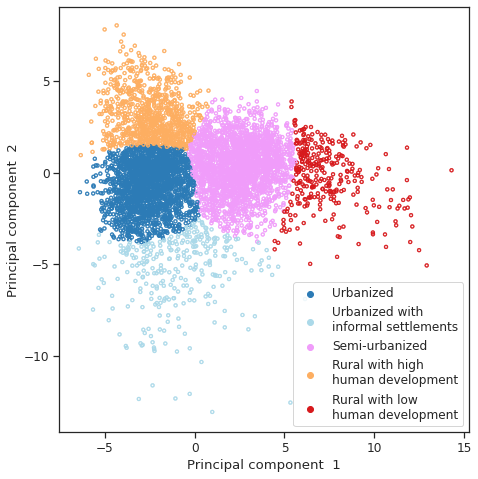

In [71]:
sns.set(font_scale=1.1)
sns.set_style("ticks")
sns.set_palette(util.get_default_colors_seaborn(5))

fig, ax = plt.subplots(figsize=(util.cm2inch(17.4), util.cm2inch(17.4)))
grafico = sns.scatterplot(x=df.principal_component_1, y=df.principal_component_2, hue=df_cluster_map.cluster_label, marker="$\circ$", ec="face")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3)
plt.legend(loc='best')
plt.xlabel('Principal component  1')
plt.ylabel('Principal component  2')

plt.tight_layout()

plt.savefig('images/scatter_clusters.eps', bbox_inches="tight")
plt.savefig('images/scatter_clusters.pdf', bbox_inches="tight")
plt.savefig('images/scatter_clusters.png', bbox_inches="tight")
plt.show()

## PCA analysis

In [72]:
df_dataset = pd.read_csv('data/'+selected_dataset+'.csv', index_col=0)

In [73]:
pca = PCA(n_components=2, whiten=False)
pca_transformed = pca.fit_transform(df_dataset)
print(sum(pca.explained_variance_ratio_))
columns = ['componente_principal_1', 'componente_principal_2']
df_pca = pd.DataFrame(pca_transformed, columns=columns, index=df_dataset.index)

0.5072537709668914


In [74]:
df.describe().round(2)

,principal_component_1,principal_component_2
count,5560.00,5560.00
mean,-0.00,0.00
std,3.24,2.28
min,-6.52,-13.14
25%,-2.65,-1.24
50%,-0.67,0.13
75%,2.43,1.40
max,14.26,7.98


In [75]:
pd.DataFrame(pca_transformed).describe().round(2)

,0,1
count,5560.00,5560.00
mean,0.00,0.00
std,3.24,2.28
min,-6.52,-13.14
25%,-2.65,-1.24
50%,-0.67,0.13
75%,2.43,1.40
max,14.26,7.98


In [76]:
eigenvalues = pca.explained_variance_
eigenvalues

array([10.51003068,  5.21766495])

In [77]:
df_eigenvectors = pd.DataFrame(pca.components_, columns=df_dataset.columns)
df_eigenvectors

,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,average_residents_per_households,percentage_population_in_households_more_2_residents_per_bedroom,percentage_male_population,percentage_indigenous_population,percentage_black_and_brown_population,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
0,0.256537,0.095962,-0.243026,-0.191713,-0.145940,0.237911,0.258103,0.067044,0.093115,0.227781,...,-0.005370,0.116018,0.239926,0.197512,0.147896,-0.082518,-0.06775,-0.166327,0.246258,-0.197028
1,-0.117751,-0.250419,0.098143,0.228559,-0.310236,-0.092978,-0.145699,0.166381,-0.024958,-0.105018,...,0.212656,-0.226482,0.173219,-0.062613,0.344242,-0.296585,-0.31028,-0.120849,0.073989,0.032501


In [78]:
df_eigenvectors_T = df_eigenvectors.T
df_eigenvectors_T['0_abs'] = df_eigenvectors_T[0].abs()
df_eigenvectors_T = df_eigenvectors_T.reset_index()
# df_eigenvectors_T['index'] = yticklabels_without_number
df_eigenvectors_T = df_eigenvectors_T.sort_values(by='0_abs', ascending=False)
df_eigenvectors_T

,index,0,1,0_abs
14,per_capita_cash_transfer_program,0.266166,0.029847,0.266166
6,percentage_population_in_households_more_2_res...,0.258103,-0.145699,0.258103
12,per_capita_income,-0.257622,-0.081084,0.257622
0,percentage_population_age_range_0_19,0.256537,-0.117751,0.256537
10,life_expectancy_at_birth,-0.250222,-0.038670,0.250222
29,illiteracy_rate,0.246258,0.073989,0.246258
2,percentage_population_age_range_40_59,-0.243026,0.098143,0.243026
23,percentage_informal_workers,0.239926,0.173219,0.239926
5,average_residents_per_households,0.237911,-0.092978,0.237911
18,percentage_population_in_households_without_ba...,0.228773,0.009227,0.228773


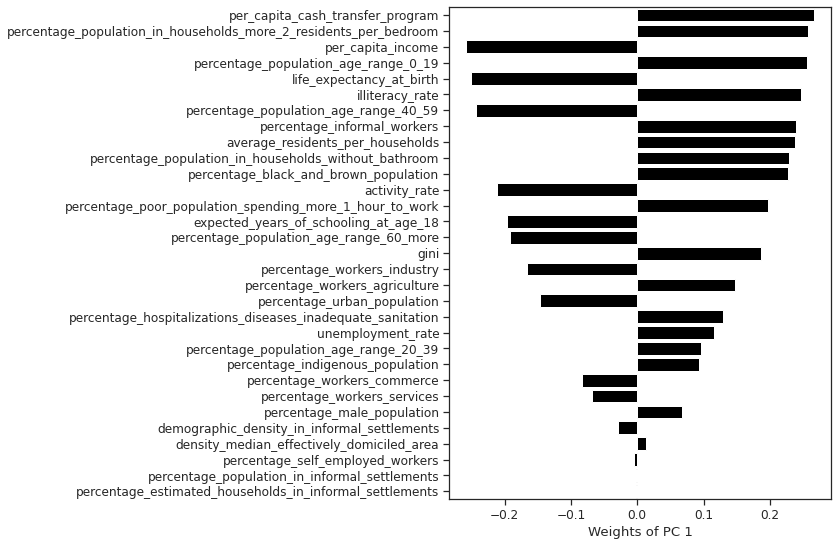

In [79]:
sns.set(font_scale=1.1)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(17.4), util.centimeter_to_inch(23)))
sns.barplot(x=0, y="index", data=df_eigenvectors_T, color='black')
plt.xlabel('Weights of PC 1')
plt.ylabel(None)
plt.show()

In [80]:
df_eigenvectors_T = df_eigenvectors.T
df_eigenvectors_T['1_abs'] = df_eigenvectors_T[1].abs()
df_eigenvectors_T = df_eigenvectors_T.reset_index()
# df_eigenvectors_T['index'] = yticklabels_without_number
df_eigenvectors_T = df_eigenvectors_T.sort_values(by='1_abs', ascending=False)
df_eigenvectors_T

,index,0,1,1_abs
25,percentage_workers_agriculture,0.147896,0.344242,0.344242
27,percentage_workers_services,-0.067750,-0.310280,0.310280
4,percentage_urban_population,-0.145940,-0.310236,0.310236
11,density_median_effectively_domiciled_area,0.012722,-0.306363,0.306363
26,percentage_workers_commerce,-0.082518,-0.296585,0.296585
1,percentage_population_age_range_20_39,0.095962,-0.250419,0.250419
3,percentage_population_age_range_60_more,-0.191713,0.228559,0.228559
22,unemployment_rate,0.116018,-0.226482,0.226482
15,percentage_estimated_households_in_informal_se...,-0.002096,-0.221193,0.221193
21,percentage_self_employed_workers,-0.005370,0.212656,0.212656


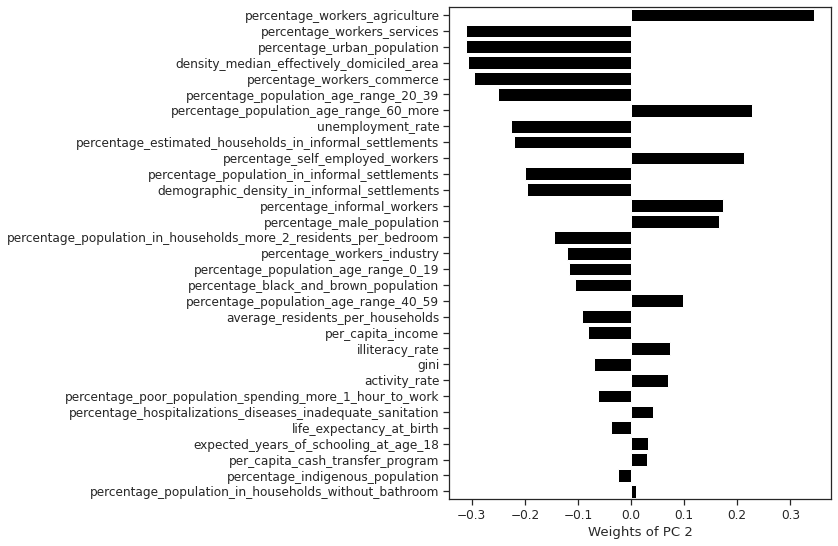

In [81]:
fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(17.4), util.centimeter_to_inch(23)))
sns.barplot(x=1, y="index", data=df_eigenvectors_T, color='black')
plt.xlabel('Weights of PC 2')
plt.ylabel(None)
plt.show()

In [82]:
def make_legend_arrow(legend, orig_handle,
                      xdescent, ydescent,
                      width, height, fontsize):
    p = mpl.patches.FancyArrow(0, 0.5*height, width, 0, length_includes_head=True, head_width=0.75*height )
    return p

def biplot(score, coeff, feature_names, filtro_atributos, clusters):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    sns.set(font_scale=1.1)
    sns.set_style("ticks")

    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(17.4), util.centimeter_to_inch(17.4)))
    # handle_scatterplot = sns.scatterplot(x=xs, y=ys, color='w', edgecolor='gainsboro', legend=True)
    # handle_scatterplot = plt.scatter(x=xs, y=ys, c='w', edgecolors='gainsboro')
    colors = ['red','blue','green','pink','orange']
    for cluster, color in zip(np.unique(clusters), colors):
        print(cluster,': ',color)
        handle_scatterplot = plt.scatter(x=xs[clusters==cluster], y=ys[clusters==cluster], c='w', edgecolors=color)

    handle_top_five_influence = None
    handle_low_influence = None
    for i in range(n):
        if feature_names[i] in filtro_atributos:
            #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
            handle = plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'black', linestyle = '-',linewidth = 1.5, head_width=0.05, head_length=0.05)
            if handle_top_five_influence is None:
                handle_top_five_influence = handle
            ha = 'left'
            if feature_names[i] == '% urban population':
                ha = 'center'
            plt.text(coeff[i,0] + 0.025, coeff[i,1] - 0.035, feature_names[i], color = 'black', ha = ha, va = 'top')
        else:
            handle = plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'gray', linestyle = '-',linewidth = 1.5, head_width=0.05, head_length=0.05)
            if handle_low_influence is None:
                handle_low_influence = handle

    plt.xlabel("Principal component {}".format(1))
    plt.ylabel("Principal component {}".format(2))    
    plt.xlim([-8,14])
    plt.ylim([8,-14])
    plt.legend([handle_top_five_influence, handle_low_influence, handle_scatterplot], ['Top 5 weights', 'Low influence weights', 'Point scores'], handler_map={mpl.patches.FancyArrow : mpl.legend_handler.HandlerPatch(patch_func=make_legend_arrow)})
    # plt.legend([handle_scatterplot], ['Point score'])
    plt.tick_params(axis='both', which='both', labelsize=14)

Rural with high human development :  red
Rural with low human development :  blue
Semi-urbanized :  green
Urbanized :  pink
Urbanized with informal settlements :  orange


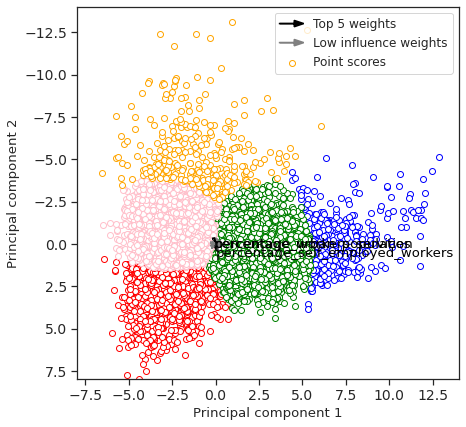

In [83]:
attributes_filter = ['percentage_urban_population', 'percentage_self_employed_workers', 'percentage_workers_services']
biplot(pca_transformed[:,0:2], np.transpose(pca.components_[0:2, :]), df_dataset.columns, attributes_filter, df_base_clusters.cluster_label)
plt.show()

## Cluster analysis


Semi-urbanized
PC 1


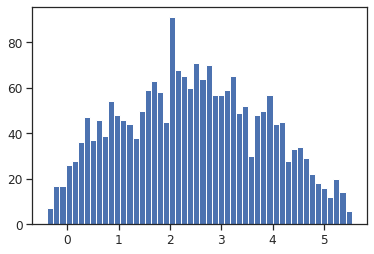

Shapiro-Wilk Test Statistic: 0.9840238690376282
p-value: 9.513536944447294e-15
Sample does not look Gaussian (reject H0)
Skewness: 0.06970370224076203
Kurtosis: 2.193026844272892
PC 2


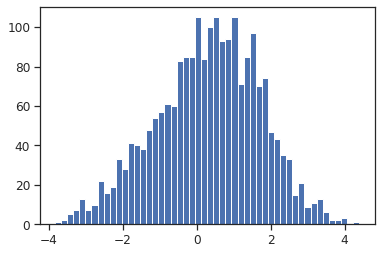

Shapiro-Wilk Test Statistic: 0.9940833449363708
p-value: 1.495006500817908e-07
Sample does not look Gaussian (reject H0)
Skewness: -0.22246559281487058
Kurtosis: 2.7227456504008565

Urbanized
PC 1


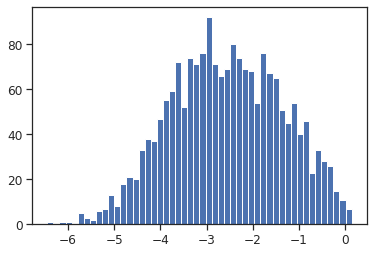

Shapiro-Wilk Test Statistic: 0.9925937056541443
p-value: 2.3313711849937135e-08
Sample does not look Gaussian (reject H0)
Skewness: -0.05789983460989483
Kurtosis: 2.43395582489508
PC 2


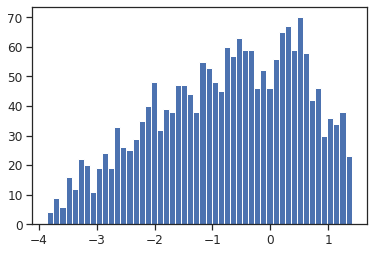

Shapiro-Wilk Test Statistic: 0.9707779884338379
p-value: 1.7449421550715575e-19
Sample does not look Gaussian (reject H0)
Skewness: -0.33786341011893845
Kurtosis: 2.226200058936449

Rural with high human development
PC 1


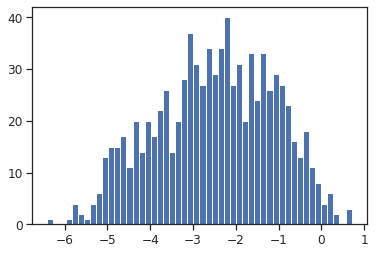

Shapiro-Wilk Test Statistic: 0.9873683452606201
p-value: 9.634208026909619e-07
Sample does not look Gaussian (reject H0)
Skewness: -0.18158720582202983
Kurtosis: 2.327020815796135
PC 2


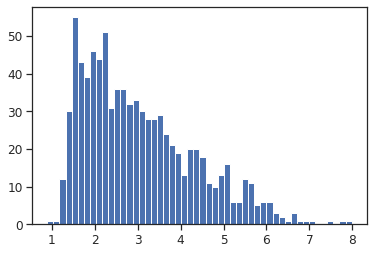

Shapiro-Wilk Test Statistic: 0.9347075819969177
p-value: 6.657131475250867e-19
Sample does not look Gaussian (reject H0)
Skewness: 0.8381170692226151
Kurtosis: 3.146287222701831

Urbanized with informal settlements
PC 1


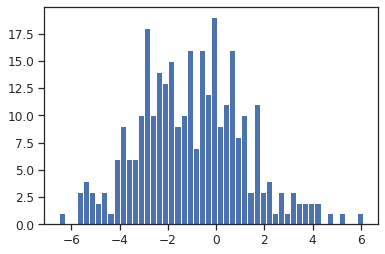

Shapiro-Wilk Test Statistic: 0.9938449859619141
p-value: 0.24668176472187042
Sample looks Gaussian (fail to reject H0)
Skewness: 0.23152814821193524
Kurtosis: 3.022385113563887
PC 2


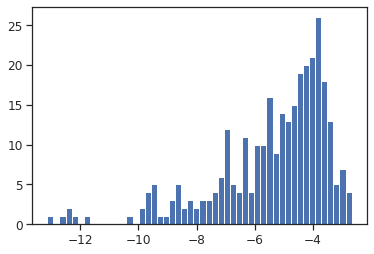

Shapiro-Wilk Test Statistic: 0.8840229511260986
p-value: 1.666223582719173e-14
Sample does not look Gaussian (reject H0)
Skewness: -1.3676679669377665
Kurtosis: 4.9443855860838966

Rural with low human development
PC 1


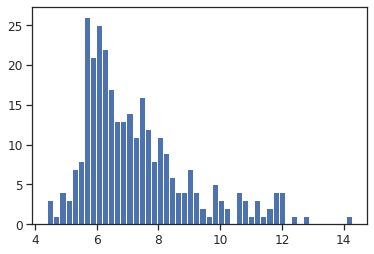

Shapiro-Wilk Test Statistic: 0.8981267213821411
p-value: 1.6690392557611178e-13
Sample does not look Gaussian (reject H0)
Skewness: 1.2159372703430529
Kurtosis: 4.205861678182558
PC 2


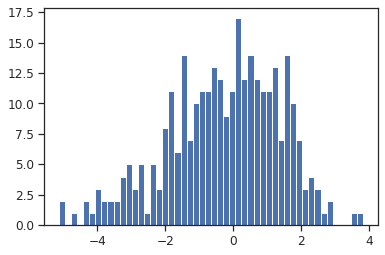

Shapiro-Wilk Test Statistic: 0.9834566712379456
p-value: 0.0013131506275385618
Sample does not look Gaussian (reject H0)
Skewness: -0.43423925789342316
Kurtosis: 2.8481254527030258


In [84]:
alpha = 0.05

for cluster in df_base_clusters['cluster_label'].unique():
    print('\n'+cluster)    
    df_components = df[df_base_clusters['cluster_label'] == cluster]
    
    print('PC 1')
    plt.hist(df_components['principal_component_1'], bins=50)
    plt.show()
    statistic, p_value = shapiro(df_components['principal_component_1'])
    print("Shapiro-Wilk Test Statistic:", statistic)
    print("p-value:", p_value)    
    if p_value > alpha:
        print("Sample looks Gaussian (fail to reject H0)")
    else:
        print("Sample does not look Gaussian (reject H0)")
    # Compute skewness
    skewness = skew(df_components['principal_component_1'])
    
    # Compute kurtosis
    kurt = kurtosis(df_components['principal_component_1'], fisher=False)
    
    # Print the results
    print("Skewness:", skewness)
    print("Kurtosis:", kurt)        

    print('PC 2')
    plt.hist(df_components['principal_component_2'], bins=50)
    plt.show()
    statistic, p_value = shapiro(df_components['principal_component_2'])
    print("Shapiro-Wilk Test Statistic:", statistic)
    print("p-value:", p_value)    
    if p_value > alpha:
        print("Sample looks Gaussian (fail to reject H0)")
    else:
        print("Sample does not look Gaussian (reject H0)")
    # Compute skewness
    skewness = skew(df_components['principal_component_2'])
    
    # Compute kurtosis
    kurt = kurtosis(df_components['principal_component_2'], fisher=False)
    
    # Print the results
    print("Skewness:", skewness)
    print("Kurtosis:", kurt)    

## Saving data

In [85]:
df_labeled_cluster = df_base_clusters[['code_municipality_7', 'cluster','cluster_label']]

In [86]:
df_labeled_cluster.to_csv('data/output/df_labeled_cluster.csv', index=True)